In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import PIL
import shutil
import sys

In [2]:
os.getcwd()

'/kaggle/working'

In [3]:
# Input data files are available in the read-only "../input/" directory
# Files available in 
#       /kaggle/input/skin-cancer/Skin cancer ISIC The International Skin Imaging Collaboration/Test
#       /kaggle/input/skin-cancer/Skin cancer ISIC The International Skin Imaging Collaboration/Train
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
path_to_train_directory = "/kaggle/input/skin-cancer/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
path_to_test_directory = "/kaggle/input/skin-cancer/Skin cancer ISIC The International Skin Imaging Collaboration/Test/"
path_to_train_directory = os.path.abspath(path_to_train_directory) + "/"
path_to_test_directory = os.path.abspath(path_to_test_directory) + "/"
data_dir_train = pathlib.Path(path_to_train_directory)
data_dir_test = pathlib.Path(path_to_test_directory)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [5]:
batch_size = 32
img_height = 180
img_width = 180

In [6]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


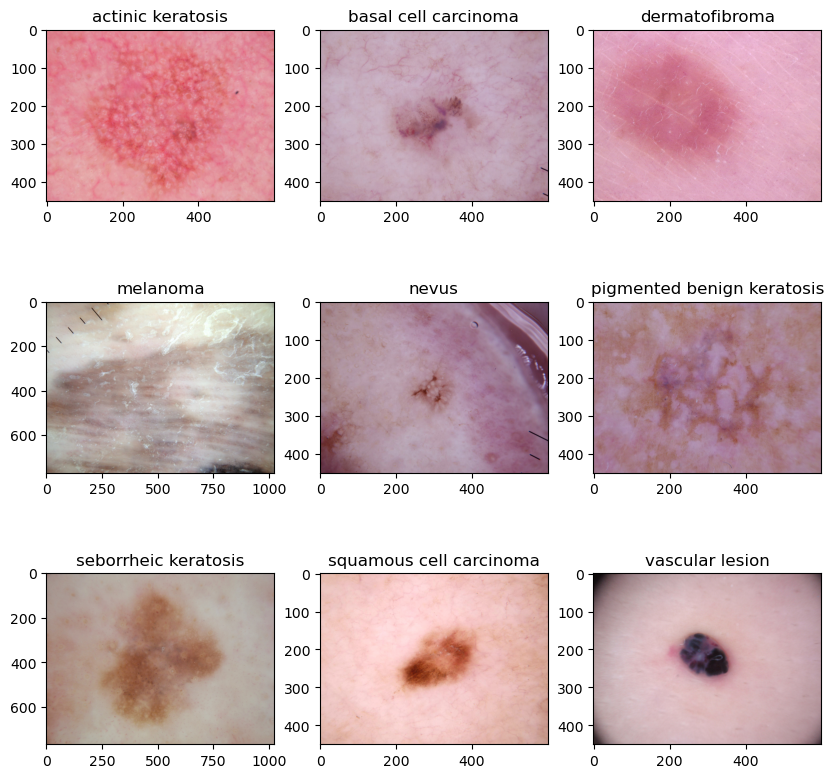

In [9]:
import matplotlib.image as mpimg
plt.figure(figsize=(10,10))
for i in range(9): 
  plt.subplot(3, 3, i + 1)
  image = mpimg.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
num_classes = 9

model = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)), # standardize values to be in the [0, 1]
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])


In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [14]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 28s 89ms/step - loss: 1.9286 - accuracy: 0.2896 - val_loss: 1.8164 - val_accuracy: 0.3378
Epoch 2/20
56/56 [==============================] - 1s 15ms/step - loss: 1.6595 - accuracy: 0.4152 - val_loss: 1.5319 - val_accuracy: 0.4989
Epoch 3/20
56/56 [==============================] - 1s 16ms/step - loss: 1.4403 - accuracy: 0.5056 - val_loss: 1.4191 - val_accuracy: 0.5280
Epoch 4/20
56/56 [==============================] - 1s 15ms/step - loss: 1.3666 - accuracy: 0.5307 - val_loss: 1.3936 - val_accuracy: 0.5324
Epoch 5/20
56/56 [==============================] - 1s 15ms/step - loss: 1.2835 - accuracy: 0.5614 - val_loss: 1.3649 - val_accuracy: 0.5213
Epoch 6/20
56/56 [==============================] - 1s 15ms/step - loss: 1.2032 - accuracy: 0.5865 - val_loss: 1.3868 - val_accuracy: 0.5526
Epoch 7/20
56/56 [==============================] - 1s 16ms/step - loss: 1.1331 - accuracy: 0.5932 - val_loss: 1.3962 - val_accuracy: 0.5302
Epoch 8/20
5